In [82]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import os


In [83]:
data = pd.read_csv("wine_reviews.csv")
data.head()

,review
0,Easily the best Sauvignon Blanc I've had to da...
1,"Excellent, Mockingbird Inn?\n"
2,Absolutely incredible. One of the best sauvign...
3,Reported in nytimes. Did not try
4,Great. Much different than other Sauv Blancs s...


In [84]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [ ]:
categories = [
    "talks about food combinations",
    "talks about taste",
    "talks about value for money",
    "other"
]

# Rationale: The 'facebook/bart-large-mnli' model is suitable for zero-shot classification
# as it has been trained on the MNLI dataset, making it effective in understanding
# textual entailment and assigning texts to appropriate categories.



#Classify Reviews


In [86]:
def classify_review(review):
    try:
        result = classifier(review, categories)
        return result["labels"][0]  # Get the top predicted label
    except Exception as e:
        print(f"Error processing review: {review}")
        print(e)
        return "other"

data["talks_about"] = data["review"].apply(classify_review)


#Visualize the Spread of Categories


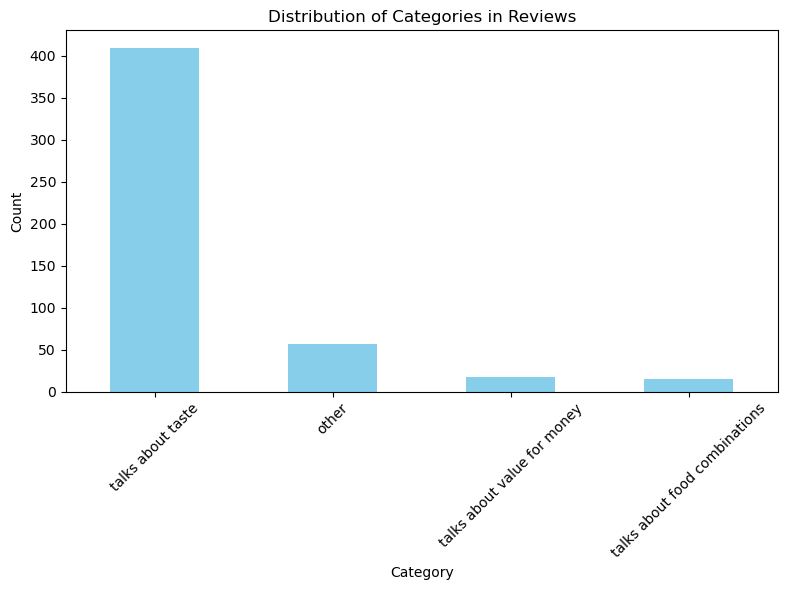

In [87]:
category_counts = data["talks_about"].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Categories in Reviews")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#Save the Updated Dataset


In [88]:
output_path = "updated_wine_reviews.csv"
data.to_csv(output_path, index=False)
print(f"Updated dataset saved to: {output_path}")


Updated dataset saved to: updated_wine_reviews.csv
